In [1]:
import numpy as np 
import json
from matplotlib import pyplot as plt

from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score



In [2]:
f = open(r'shipsnet.json')

In [3]:
dataset = json.load(f)

In [4]:
f.close()

In [5]:
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [6]:
data = np.array(dataset['data']).astype('uint8')
img_length = 80 
data = data.reshape(-1,3, img_length, img_length).transpose([0,2,3,1])

In [7]:
data.shape

(4000, 80, 80, 3)

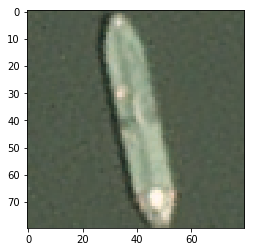

In [8]:
plt.imshow(data[51])

In [9]:
data_gray = [color.rgb2gray(i) for i in data]

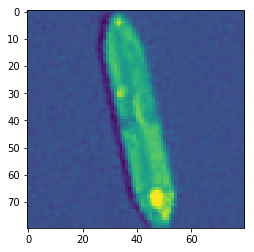

In [10]:
plt.imshow(data_gray[51])

In [11]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray: 
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

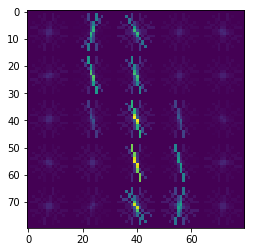

In [12]:
plt.imshow(hog_images[51])


In [13]:
labels = np.array(dataset['labels']).reshape(len(dataset['labels']),1)

In [14]:
labels.shape

(4000, 1)

In [15]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))

In [16]:
np.random.shuffle(data_frame)

In [17]:
percentage = 80 
partition = int(len(hog_features)*percentage/100)

In [18]:
x_train, x_test = data_frame[:partition,:-1], data_frame[partition:, :-1]
y_train, y_test = data_frame[:partition,-1:].ravel(), data_frame[partition:, -1:].ravel()

In [19]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9025


             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94       603
        1.0       0.90      0.68      0.77       197

avg / total       0.90      0.90      0.90       800

